In [67]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [68]:
names =["Rank", "Location", "Tuition", "Major", "Salary"]
# TODO 
# dftrain = pd.read_csv(...)
df = pd.read_csv('usuable_data_student_success.csv',
                 names=names,na_values='?')
df

,Rank,Location,Tuition,Major,Salary
0,99,AL,28840,Management,41400
1,99,AL,28840,Business,41400
2,99,AL,28840,Architecture,48800
3,99,AL,28840,Med,34800
4,99,AL,28840,Communication,34800
...,...,...,...,...,...
3066,5,CA,47940,Language,24200
3067,5,CA,47940,Bio,35900
3068,5,CA,47940,Bio,36200
3069,5,CA,47940,Psychology,41300


In [69]:
cat_columns = ["Location", "Major"]
df_processed = pd.get_dummies(df, prefix_sep="__",
                              columns=cat_columns)
label_encoders = {}
for col in cat_columns:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_processed[col] = new_le.fit_transform(df[col])
    label_encoders[col] = new_le
    
df_processed = df_processed.drop(columns="Location")
df_processed = df_processed.drop(columns="Major")


df_processed.head(10)


Encoding Location
Encoding Major


,Rank,Tuition,Salary,Location__AL,Location__AR,Location__AZ,Location__CA,Location__CO,Location__CT,Location__DC,...,Major__Math,Major__Mechanical,Major__Med,Major__Music,Major__Nursing,Major__Philosophy,Major__Physics,Major__Politic,Major__Psychology,Major__Sociology
0,99,28840,41400,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99,28840,41400,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,99,28840,48800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,99,28840,34800,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,99,28840,34800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,99,28840,34800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,99,28840,52800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,99,28840,33900,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,99,28840,35900,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,99,28840,33600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#split into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_processed, test_size=0.2)
train.shape

(2456, 75)

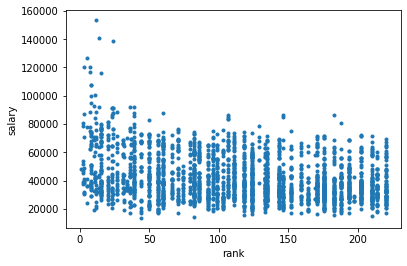

In [71]:
ytrain = np.array(train['Salary'])
rank = np.array(train['Rank'])
plt.xlabel('rank')
plt.ylabel('salary')
plt.plot(rank,ytrain,'.')

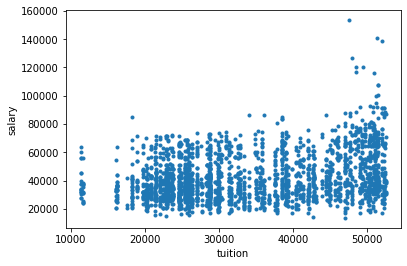

In [72]:
tuition = np.array(train['Tuition'])
plt.xlabel('tuition')
plt.ylabel('salary')
plt.plot(tuition,ytrain,'.')

In [96]:
#find xtrain
predCol = []
for col in train.columns:
    if col!="Salary":
        predCol.append(col)
xtrain = train[predCol]
xtest = test[predCol]
ytest = test["Salary"]

In [97]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
regr.coef_

array([-6.43821996e+01,  1.26924131e-01, -3.00813522e+03,  1.58890824e+03,
       -2.43262192e+03, -2.26478191e+03, -6.29596164e+02, -1.45171581e+03,
       -8.07632982e+01,  4.48345735e+02, -4.73227495e+03, -7.47408017e+03,
       -9.84610066e+01,  1.52887138e+03,  2.29528988e+02,  8.47286716e+02,
        3.45086810e+02, -9.87057438e+02,  4.54554702e+03,  1.98234204e+03,
        4.45668132e+03, -2.20690484e+03,  2.13350446e+03, -8.37912710e+03,
       -2.52721625e+03,  3.15892928e+03,  1.81761729e+03,  6.85687722e+03,
        8.46736236e+03,  9.66585851e+02, -2.10024229e+03,  5.68906285e+02,
       -2.56652266e+03, -4.85897555e+03,  1.58152876e+03,  3.05156861e+03,
       -4.69364664e+03,  4.61860630e+03, -3.05392757e+02,  5.55688898e+01,
        4.33939841e+03,  5.80341671e+02, -8.63584992e+03,  2.91516288e+03,
        3.85765603e+02,  1.44244967e+03,  5.20594109e+02,  3.70308952e+03,
       -1.21184813e+04, -9.64707415e+03,  6.01475104e+03,  8.89869593e+03,
        1.88211816e+03,  

In [99]:
regr.intercept_

44797.97426475772

In [100]:
ytrain_pred = regr.predict(xtrain)
lossm = np.linalg.norm(ytrain_pred - ytrain)**2

print("multiple variable loss="+"{:.2e}".format(lossm))

multiple variable loss=2.35e+11


In [101]:
ytest_pred = regr.predict(xtest)
lossm = np.linalg.norm(ytest_pred - ytest)**2

print("multiple variable loss="+"{:.2e}".format(lossm))

multiple variable loss=7.53e+10


In [110]:
ysal = pd.Series(ytrain)
print(ysal.shape)
strongestCorr, column = 0, ""
for col in predCol:
    predV = xtrain[col]
    corr = predV.corr(ysal)
    if abs(corr)>abs(strongestCorr):
        strongestCorr = corr
        column = col
    print("Correlation between ",col," and Salary is ", corr)
print("The strongest indicator with the highest correlation is ", column,", with a correlation co")

(2456,)
Correlation between  Rank  and Salary is  -0.02110859604882787
Correlation between  Tuition  and Salary is  -0.008882537413195425
Correlation between  Location__AL  and Salary is  0.03880661273367964
Correlation between  Location__AR  and Salary is  0.013826582455906069
Correlation between  Location__AZ  and Salary is  0.0002588396871877094
Correlation between  Location__CA  and Salary is  0.009438878684517697
Correlation between  Location__CO  and Salary is  -0.01653097422911796
Correlation between  Location__CT  and Salary is  0.002849442999340415
Correlation between  Location__DC  and Salary is  0.03955959426828914
Correlation between  Location__DE  and Salary is  -0.0003278586459899337
Correlation between  Location__FL  and Salary is  -0.0036233632719885095
Correlation between  Location__GA  and Salary is  -0.025132557294432756
Correlation between  Location__IA  and Salary is  -0.026548292586763715
Correlation between  Location__ID  and Salary is  -0.04400335572853895
Corre